In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 10)

no display found. Using non-interactive Agg backend


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# naive explore of 2022 of 2015

In [3]:
df = pd.read_csv('2022_Building_Energy_Benchmarking_20240322.csv')
df

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,...,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2022,MAYFLOWER PARK HOTEL,NonResidential,0659000030,...,No Issue,3778091.0,1362900.0,264.5,2.99
1,2,2022,PARAMOUNT HOTEL,NonResidential,0659000220,...,No Issue,2383872.0,2751630.0,155.3,1.75
2,3,2022,WESTIN HOTEL (Parent Building),NonResidential,0659000475,...,No Issue,36159387.0,5699300.0,1963.7,2.59
3,5,2022,HOTEL MAX,NonResidential,0659000640,...,No Issue,2674341.0,3058990.0,298.2,4.86
4,8,2022,WARWICK SEATTLE HOTEL,NonResidential,0659000970,...,No Issue,4704626.0,7362130.0,409.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...
3643,50877,2022,BOEING Primary Standards Metrology (BLDG 15-30),NonResidential,7883608601,...,Portfolio Manager Not Connected to the City of...,NaN,NaN,NaN,NaN
3644,50879,2022,BUILDING CURE,NonResidential,0660001525,...,No Issue,23107657.0,43954750.0,2423.1,5.40
3645,50881,2022,400 University,NonResidential,7137830000,...,Default Data,635362.0,NaN,2.4,0.02
3646,50886,2022,Broadstone VIN,Multifamily MR (5-9),1825049095,...,No Issue,843455.0,NaN,3.2,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3648 non-null   int64  
 1   DataYear                         3648 non-null   int64  
 2   BuildingName                     3648 non-null   object 
 3   BuildingType                     3648 non-null   object 
 4   TaxParcelIdentificationNumber    3648 non-null   object 
 5   Address                          3648 non-null   object 
 6   City                             3647 non-null   object 
 7   State                            3647 non-null   object 
 8   ZipCode                          3593 non-null   float64
 9   Latitude                         3648 non-null   float64
 10  Longitude                        3648 non-null   float64
 11  Neighborhood                     3648 non-null   object 
 12  CouncilDistrictCode 

In [5]:
path = './'
files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(files)
previous_year_columns = []
df = pd.DataFrame()
for file in files:
    file_path = os.path.join(path, file)
    temp_df = pd.read_csv(file_path)
    if set(previous_year_columns) == set(temp_df.columns): 
        print('same columns with the previous year')
    df = pd.concat([df,temp_df],axis=0)
df

['2015_Building_Energy_Benchmarking_20240322.csv', '2022_Building_Energy_Benchmarking_20240322.csv', 'nonRe2022.csv', 'combined 1.csv', 'fitted.csv', '2016_Building_Energy_Benchmarking_20240322.csv', '2017_Building_Energy_Benchmarking_20240322.csv', 'Performance_Ranges_by_Building_Type_2022_20240322.csv', 'Re2022.csv', 'cleaned_bench_marking_2022.csv', 'combined.csv', 'labeled_bench_marking_all.csv', '2019_Building_Energy_Benchmarking_20240322.csv', 'cleaned_combine.csv', '2020_Building_Energy_Benchmarking_20240322.csv', '2021_Building_Energy_Benchmarking_20240322.csv', '2018_Building_Energy_Benchmarking_20240322.csv']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,...,EPA Building Sub Type Name,Compliance Issue,Compliance Status,GHG Emissions Intensity,Total Ghg Emissions
0,21548.0,2015.0,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,...,NaN,NaN,NaN,NaN,NaN
1,26379.0,2015.0,NonResidential,Hotel,GEORGETOWN INN,...,NaN,NaN,NaN,NaN,NaN
2,26713.0,2015.0,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,...,NaN,NaN,NaN,NaN,NaN
3,102.0,2015.0,NonResidential,Hotel,MARRIOTT RESIDENCE INN,...,NaN,NaN,NaN,NaN,NaN
4,503.0,2015.0,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3533,NaN,NaN,NaN,NaN,NaN,...,Food Service,Low Outlier - EUI,Account Requires Verification,0.0,0.0
3534,NaN,NaN,NaN,NaN,NaN,...,Self-Storage Facility,Low Outlier - EUI,Account Requires Verification,0.0,0.0
3535,NaN,NaN,NaN,NaN,NaN,...,Non-Refrigerated Warehouse,Low Outlier - EUI,Account Requires Verification,0.0,0.0
3536,NaN,NaN,NaN,NaN,NaN,...,Non-Refrigerated Warehouse,Low Outlier - EUI,Account Requires Verification,0.0,0.0


In [6]:
df2022 = pd.read_csv('2022_Building_Energy_Benchmarking_20240322.csv')
df2015 = pd.read_csv('2015_Building_Energy_Benchmarking_20240322.csv')

In [7]:
df2022.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [8]:
df2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [9]:
df2015.BuildingType.unique()

array(['Multifamily LR (1-4)', 'NonResidential', 'Multifamily HR (10+)',
       'SPS-District K-12', 'Multifamily MR (5-9)', 'Campus',
       'Nonresidential COS'], dtype=object)

In [10]:
df2022.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Nonresidential WA', 'Multifamily HR (10+)'], dtype=object)

In [11]:
set(df2015.BuildingType.unique()) == set(df2022.BuildingType.unique())

False

# Exploration of 2022

In [12]:
df2022 = pd.read_csv('2022_Building_Energy_Benchmarking_20240322.csv')
df2022.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,...,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2022,MAYFLOWER PARK HOTEL,NonResidential,0659000030,...,No Issue,3778091.0,1362900.0,264.5,2.99
1,2,2022,PARAMOUNT HOTEL,NonResidential,0659000220,...,No Issue,2383872.0,2751630.0,155.3,1.75
2,3,2022,WESTIN HOTEL (Parent Building),NonResidential,0659000475,...,No Issue,36159387.0,5699300.0,1963.7,2.59
3,5,2022,HOTEL MAX,NonResidential,0659000640,...,No Issue,2674341.0,3058990.0,298.2,4.86
4,8,2022,WARWICK SEATTLE HOTEL,NonResidential,0659000970,...,No Issue,4704626.0,7362130.0,409.0,3.60


In [13]:
df2022.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [14]:
len(df2022.BuildingName.unique())

3614

In [15]:
df2022.shape

(3648, 42)

In [16]:
len(df2022.OSEBuildingID.unique())

3647

In [17]:
df2022[df2022.duplicated()]

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,...,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
564,780,2022,KING STREET CENTER,NonResidential,5247800795,...,Missing EUI or Utility Data,NaN,NaN,NaN,NaN


In [18]:
df2022[df2022.OSEBuildingID==780]

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,...,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
563,780,2022,KING STREET CENTER,NonResidential,5247800795,...,Missing EUI or Utility Data,NaN,NaN,NaN,NaN
564,780,2022,KING STREET CENTER,NonResidential,5247800795,...,Missing EUI or Utility Data,NaN,NaN,NaN,NaN


e.g. whole foods has different buildings at various address

In [19]:
df2022[df2022.duplicated(['BuildingName'])]

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,...,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
564,780,2022,KING STREET CENTER,NonResidential,5247800795,...,Missing EUI or Utility Data,NaN,NaN,NaN,NaN
607,848,2022,HOME DEPOT,NonResidential,3026049093,...,No Issue,2991772.0,4332660.0,241.6,2.37
663,19576,2022,PAPE' MATERIAL HANDLING,NonResidential,0323049241,...,Missing EUI or Utility Data,NaN,NaN,NaN,NaN
767,19871,2022,GRANGE OFFICE PLAZA,NonResidential,0656000045,...,No Issue,435226.0,1611300.0,87.2,3.05
972,20470,2022,LAKE CITY CENTER,NonResidential,1453600540,...,Missing EUI or Utility Data,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2771,27184,2022,WAREHOUSE,NonResidential,7443001620,...,No Issue,526905.0,483300.0,27.7,0.74
2832,27405,2022,THE HARRISON,Multifamily LR (1-4),4232401360,...,"Missing EUI, Incomplete Natural Gas Data",540276.0,NaN,2.1,0.09
2976,27982,2022,OFFICE BUILDING,NonResidential,4310701210,...,No Issue,414067.0,414640.0,23.6,0.94
3004,28066,2022,OFFICE BUILDING,NonResidential,4385700325,...,No Issue,795691.0,NaN,3.1,0.16


In [20]:
df2022 = df2022.drop_duplicates(subset=['OSEBuildingID'],keep='first')
df2022.shape

(3647, 42)

In [21]:
len(df2022['TaxParcelIdentificationNumber'].unique())

3542

In [22]:
len(df2022.CouncilDistrictCode.unique())

7

In [23]:
df2022['EPAPropertyType']

0                      Hotel
1                      Hotel
2                      Hotel
3                      Hotel
4                      Hotel
                ...         
3643                     NaN
3644              Laboratory
3645                  Office
3646    Multifamily MR (5-9)
3647                     NaN
Name: EPAPropertyType, Length: 3647, dtype: object

In [24]:
df2022['LargestPropertyUseTypeGFA']

0        88434.0
1        88502.0
2       945349.0
3        61320.0
4       123445.0
          ...   
3643         NaN
3644    413858.0
3645    101264.0
3646     81338.0
3647         NaN
Name: LargestPropertyUseTypeGFA, Length: 3647, dtype: float64

'LargestPropertyUseTypeGFA': 面积大概是

In [25]:
df2022.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

SiteEnergyUse(kBtu): The annual amount of energy consumed by the property from all sources of energy.  
SiteEnergyUseWN(kBtu): The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.

'SiteEUIWN(kBtu/sf)': Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.     
'SiteEUI(kBtu/sf)': Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

Electricity(kWh)	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.  
Electricity(kBtu)	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

PropertyGFATotal: 	
Total building and parking gross floor area.  
PropertyGFABuilding(s): 	
Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc...  
'PropertyGFAParking'

SourceEUIWN(kBtu/sf): Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.  
SourceEUI(kBtu/sf): Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

In [26]:
df2022.shape

(3647, 42)

In [67]:
df = df2022.drop(columns=['OSEBuildingID','DataYear','BuildingName','TaxParcelIdentificationNumber',
                          'Address', 'City', 'State',
                          'GHGEmissionsIntensity','ComplianceIssue','ENERGYSTARScore',
                          'SiteEnergyUseWN(kBtu)','SiteEUIWN(kBtu/sf)','SiteEUI(kBtu/sf)',
                          'Electricity(kBtu)','PropertyGFABuilding(s)','SourceEUIWN(kBtu/sf)',
                         'CouncilDistrictCode','EPAPropertyType'])
df.shape

(3647, 24)

In [68]:
df.columns

Index(['BuildingType', 'ZipCode', 'Latitude', 'Longitude', 'Neighborhood',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFAParking', 'SiteEnergyUse(kBtu)', 'SourceEUI(kBtu/sf)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'Electricity(kWh)', 'SteamUse(kBtu)', 'NaturalGas(therms)',
       'ComplianceStatus', 'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

## Missing

In [69]:
df.isnull().sum()

BuildingType             0
ZipCode                 55
Latitude                 0
Longitude                0
Neighborhood             0
                      ... 
SteamUse(kBtu)        3531
NaturalGas(therms)    1923
ComplianceStatus         0
NaturalGas(kBtu)      1923
TotalGHGEmissions      301
Length: 24, dtype: int64

In [70]:
values = {'SecondLargestPropertyUseType': 'none',
          'SecondLargestPropertyUseTypeGFA': 0,
          'ThirdLargestPropertyUseType': 'none', 
          'ThirdLargestPropertyUseTypeGFA': 0,
          'SteamUse(kBtu)': 0, 
          'NaturalGas(therms)': 0, 
          'NaturalGas(kBtu)': 0,
          'NumberofBuildings': 0}
df.fillna(value=values, inplace=True)
df.isnull().sum()

BuildingType            0
ZipCode                55
Latitude                0
Longitude               0
Neighborhood            0
                     ... 
SteamUse(kBtu)          0
NaturalGas(therms)      0
ComplianceStatus        0
NaturalGas(kBtu)        0
TotalGHGEmissions     301
Length: 24, dtype: int64

In [71]:
df.dropna(inplace=True)
df.shape

(2850, 24)

In [72]:
sum(df.isnull().sum())

0

In [73]:
df.to_csv('cleaned_bench_marking_2022.csv')

In [74]:
cat = ['BuildingType','ZipCode','Neighborhood',
       'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
       'ComplianceStatus'
      ]

In [75]:
df.ComplianceStatus.unique()

array(['Compliant', 'Not Compliant'], dtype=object)

## LabelEncoder

In [76]:
from sklearn.preprocessing import LabelEncoder
for c in cat:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])

In [77]:
df

,BuildingType,ZipCode,Latitude,Longitude,Neighborhood,...,SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,NaturalGas(kBtu),TotalGHGEmissions
0,4,0,47.61220,-122.33799,3,...,2192383.0,13629.0,0,1362900.0,264.5
1,4,0,47.61307,-122.33361,3,...,0.0,27516.0,0,2751630.0,155.3
2,4,0,47.61367,-122.33822,3,...,18793702.0,56993.0,0,5699300.0,1963.7
3,4,0,47.61412,-122.33664,3,...,1549427.0,30590.0,0,3058990.0,298.2
4,4,15,47.61375,-122.34047,3,...,0.0,73621.0,0,7362130.0,409.0
...,...,...,...,...,...,...,...,...,...,...,...
3640,1,3,47.60018,-122.32811,3,...,0.0,24752.0,0,2475190.0,145.4
3641,3,16,47.61272,-122.31968,4,...,0.0,3996.0,0,399600.0,23.0
3644,4,0,47.61689,-122.33410,3,...,0.0,439548.0,0,43954750.0,2423.1
3645,4,0,47.60844,-122.33470,3,...,0.0,0.0,1,0.0,2.4


## Outlier

<Axes: xlabel='NaturalGas(kBtu)', ylabel='TotalGHGEmissions'>

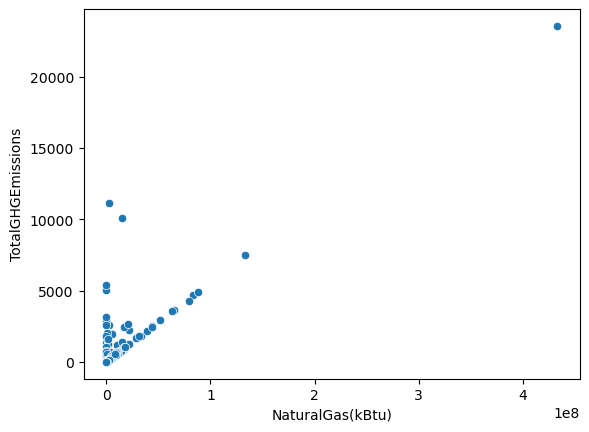

In [78]:
sns.scatterplot(data=df, x='NaturalGas(kBtu)',y='TotalGHGEmissions')

In [79]:
df.describe()

,BuildingType,ZipCode,Latitude,Longitude,Neighborhood,...,SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,NaturalGas(kBtu),TotalGHGEmissions
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,...,2.850000e+03,2.850000e+03,2850.000000,2.850000e+03,2850.000000
mean,3.155439,10.248421,47.626009,-122.335538,6.582456,...,3.328903e+05,1.724455e+04,0.033684,1.724454e+06,132.571789
std,1.278126,7.186238,0.047146,0.027223,4.447783,...,4.045244e+06,9.617605e+04,0.180447,9.617605e+06,632.442789
min,0.000000,0.000000,47.499170,-122.414250,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.400000
25%,2.000000,4.000000,47.602355,-122.351728,3.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.700000
50%,3.000000,9.000000,47.619985,-122.333460,6.000000,...,0.000000e+00,2.987500e+03,0.000000,2.987200e+05,29.900000
75%,4.000000,16.000000,47.658068,-122.319672,9.000000,...,0.000000e+00,1.466325e+04,0.000000,1.466325e+06,100.450000
max,7.000000,28.000000,47.733870,-122.258640,19.000000,...,1.309626e+08,4.327243e+06,1.000000,4.327243e+08,23545.100000


In [80]:
df = df[df.TotalGHGEmissions<df.TotalGHGEmissions.quantile(0.95)]
df.shape

(2707, 24)

In [81]:
df.to_csv('cleaned_bench_marking_2022.csv')

## Split Dataset

In [82]:
X = df.drop(columns=['TotalGHGEmissions'])
y = df['TotalGHGEmissions']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1894, 23)
(1894,)
(813, 23)
(813,)


In [84]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)
X_train.head()

,BuildingType,ZipCode,Latitude,Longitude,Neighborhood,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,NaturalGas(kBtu)
0,-0.945303,-0.592526,0.844650,-1.598415,-1.493326,...,-0.339515,-0.136558,-0.633769,-0.180874,-0.633769
1,-0.945303,-1.153999,0.460346,-0.030284,-0.137882,...,-0.251774,-0.136558,-0.633769,-0.180874,-0.633769
2,0.666222,-0.452158,-2.124544,0.248302,-0.363789,...,-0.345255,-0.136558,-0.633769,-0.180874,-0.633769
3,-0.945303,0.811156,-0.221133,0.882374,-0.589697,...,-0.399328,-0.136558,2.505743,-0.180874,2.505724
4,-0.945303,0.390052,-1.790941,2.275664,2.347098,...,-0.340139,-0.136558,-0.633769,-0.180874,-0.633769


In [85]:
X_train.columns

Index(['BuildingType', 'ZipCode', 'Latitude', 'Longitude', 'Neighborhood',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFAParking', 'SiteEnergyUse(kBtu)', 'SourceEUI(kBtu/sf)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'Electricity(kWh)', 'SteamUse(kBtu)', 'NaturalGas(therms)',
       'ComplianceStatus', 'NaturalGas(kBtu)'],
      dtype='object')

## Feature Selection

### PCA

In [86]:
from sklearn.decomposition import PCA

In [87]:
pcs = PCA(n_components= X_train.shape[1])
pcs.fit(X_train)
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                index=X_train.columns)

pc1 = pcsComponents_df[0].abs().sort_values(ascending=False)[:X_train.shape[1]]
pc2 = pcsComponents_df[1].abs().sort_values(ascending=False)[:X_train.shape[1]]
print('top {} features by PC1:'.format(X_train.shape[1]))
display(pc1)
print('top {} features by PC2:'.format(X_train.shape[1]))
display(pc2)

top 23 features by PC1:


PropertyGFATotal                   0.379233
LargestPropertyUseTypeGFA          0.365874
SiteEnergyUse(kBtu)                0.354745
SecondLargestPropertyUseTypeGFA    0.350773
Electricity(kWh)                   0.338224
                                     ...   
Latitude                           0.026745
NumberofBuildings                  0.024052
Longitude                          0.009906
LargestPropertyUseType             0.006479
ComplianceStatus                   0.000865
Name: 0, Length: 23, dtype: float64

top 23 features by PC2:


NaturalGas(kBtu)                0.556060
NaturalGas(therms)              0.556059
SourceEUI(kBtu/sf)              0.334706
BuildingType                    0.272696
NumberofFloors                  0.187285
                                  ...   
SecondLargestPropertyUseType    0.031615
NumberofBuildings               0.027744
Electricity(kWh)                0.007157
ZipCode                         0.002774
ThirdLargestPropertyUseType     0.002291
Name: 1, Length: 23, dtype: float64

## Filter

### backward elimination

In [88]:
def train_model(variables):
    if len(variables) == 0:
        # Return None to indicate a constant model (no predictors)
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

In [89]:
def score_model(model, variables):
    if len(variables) == 0:
        # Special case for constant model
        dummy_predictions = [y_train.mean()] * len(y_train)
        return AIC_score(y_train, dummy_predictions, model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)

In [90]:
allVariables = X_train.columns
best_model, bs_best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)

print("Best variables:", bs_best_variables)
regressionSummary(y_test, best_model.predict(X_test[bs_best_variables]))

Variables: BuildingType, ZipCode, Latitude, Longitude, Neighborhood, YearBuilt, NumberofFloors, NumberofBuildings, PropertyGFATotal, PropertyGFAParking, SiteEnergyUse(kBtu), SourceEUI(kBtu/sf), LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, Electricity(kWh), SteamUse(kBtu), NaturalGas(therms), ComplianceStatus, NaturalGas(kBtu)
Start: score=-8001.26
Step: score=-8003.25, remove SiteEnergyUse(kBtu)
Step: score=-8005.24, remove PropertyGFAParking
Step: score=-8007.22, remove LargestPropertyUseTypeGFA
Step: score=-8009.20, remove LargestPropertyUseType
Step: score=-8011.13, remove Neighborhood
Step: score=-8013.03, remove ThirdLargestPropertyUseTypeGFA
Step: score=-8014.75, remove NumberofBuildings
Step: score=-8016.42, remove ZipCode
Step: score=-8017.63, remove Latitude
Step: score=-8018.26, remove SecondLargestPropertyUseTypeGFA
Step: score=-8018.97, remove Bu

### together

In [91]:
pc1_df = pd.DataFrame(pc1).reset_index()
pc1_df.columns=['variables','score']

In [92]:
bs_df = pd.DataFrame(bs_best_variables)
bs_df.columns=['variables']

In [93]:
bs_ordered = pd.merge(pc1_df,bs_df,on=['variables'],how='right').sort_values(by='score',ascending=False)

In [94]:
bs_ordered

,variables,score
3,Electricity(kWh),0.338224
7,NaturalGas(kBtu),0.155969
5,NaturalGas(therms),0.155969
2,SecondLargestPropertyUseType,0.133824
1,SourceEUI(kBtu/sf),0.081365
4,SteamUse(kBtu),0.055179
0,Longitude,0.009906
6,ComplianceStatus,0.000865


only 2022

In [95]:
n = len(bs_best_variables)
features_rank = pd.DataFrame([pc1.index[:n], 
                              #pc2.index[:n], 
                              bs_ordered.variables], 
                             index=['PC1',
                                    #'PC2',
                                    'BackwardElimination'])
features_rank.T

,PC1,BackwardElimination
0,PropertyGFATotal,Electricity(kWh)
1,LargestPropertyUseTypeGFA,NaturalGas(kBtu)
2,SiteEnergyUse(kBtu),NaturalGas(therms)
3,SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseType
4,Electricity(kWh),SourceEUI(kBtu/sf)
5,PropertyGFAParking,SteamUse(kBtu)
6,NumberofFloors,Longitude
7,ThirdLargestPropertyUseTypeGFA,ComplianceStatus


In [96]:
set(bs_best_variables) - set(pc1.index[:n])

{'ComplianceStatus',
 'Longitude',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'SecondLargestPropertyUseType',
 'SourceEUI(kBtu/sf)',
 'SteamUse(kBtu)'}

In [97]:
set(pc1.index[:n]) - set(bs_best_variables)

{'LargestPropertyUseTypeGFA',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEnergyUse(kBtu)',
 'ThirdLargestPropertyUseTypeGFA'}

In [98]:
bs_best_variables

['Longitude',
 'SourceEUI(kBtu/sf)',
 'SecondLargestPropertyUseType',
 'Electricity(kWh)',
 'SteamUse(kBtu)',
 'NaturalGas(therms)',
 'ComplianceStatus',
 'NaturalGas(kBtu)']

In [99]:
pc1.index[:n]

Index(['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
       'SecondLargestPropertyUseTypeGFA', 'Electricity(kWh)',
       'PropertyGFAParking', 'NumberofFloors',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

# Models

## LinearRegression

In [100]:
lm_multiple = LinearRegression()
lm_multiple.fit(X_train[bs_ordered.variables], y_train)

# Interpretation of coefficients
coefficients = pd.DataFrame({'Features': bs_ordered.variables, 'Coefficients': lm_multiple.coef_})
print(coefficients)

# Model evaluation
y_pred_multiple = lm_multiple.predict(X_test[bs_ordered.variables])
r2_multiple = r2_score(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple))
print("R-squared (Multiple Regression):", r2_multiple)
print("RMSE (Multiple Regression):", rmse_multiple)
regressionSummary(y_test, y_pred_multiple)

                       Features  Coefficients
3              Electricity(kWh)     20.186680
7              NaturalGas(kBtu)    -66.265463
5            NaturalGas(therms)    142.741073
2  SecondLargestPropertyUseType     -0.001436
1            SourceEUI(kBtu/sf)      0.001079
4                SteamUse(kBtu)     28.335942
0                     Longitude     -0.000989
6              ComplianceStatus      0.001358
R-squared (Multiple Regression): 0.999999874023687
RMSE (Multiple Regression): 0.02947348836404566

Regression statistics

                      Mean Error (ME) : 0.0014
       Root Mean Squared Error (RMSE) : 0.0295
            Mean Absolute Error (MAE) : 0.0257
          Mean Percentage Error (MPE) : 0.0316
Mean Absolute Percentage Error (MAPE) : 0.3077


use all columns:
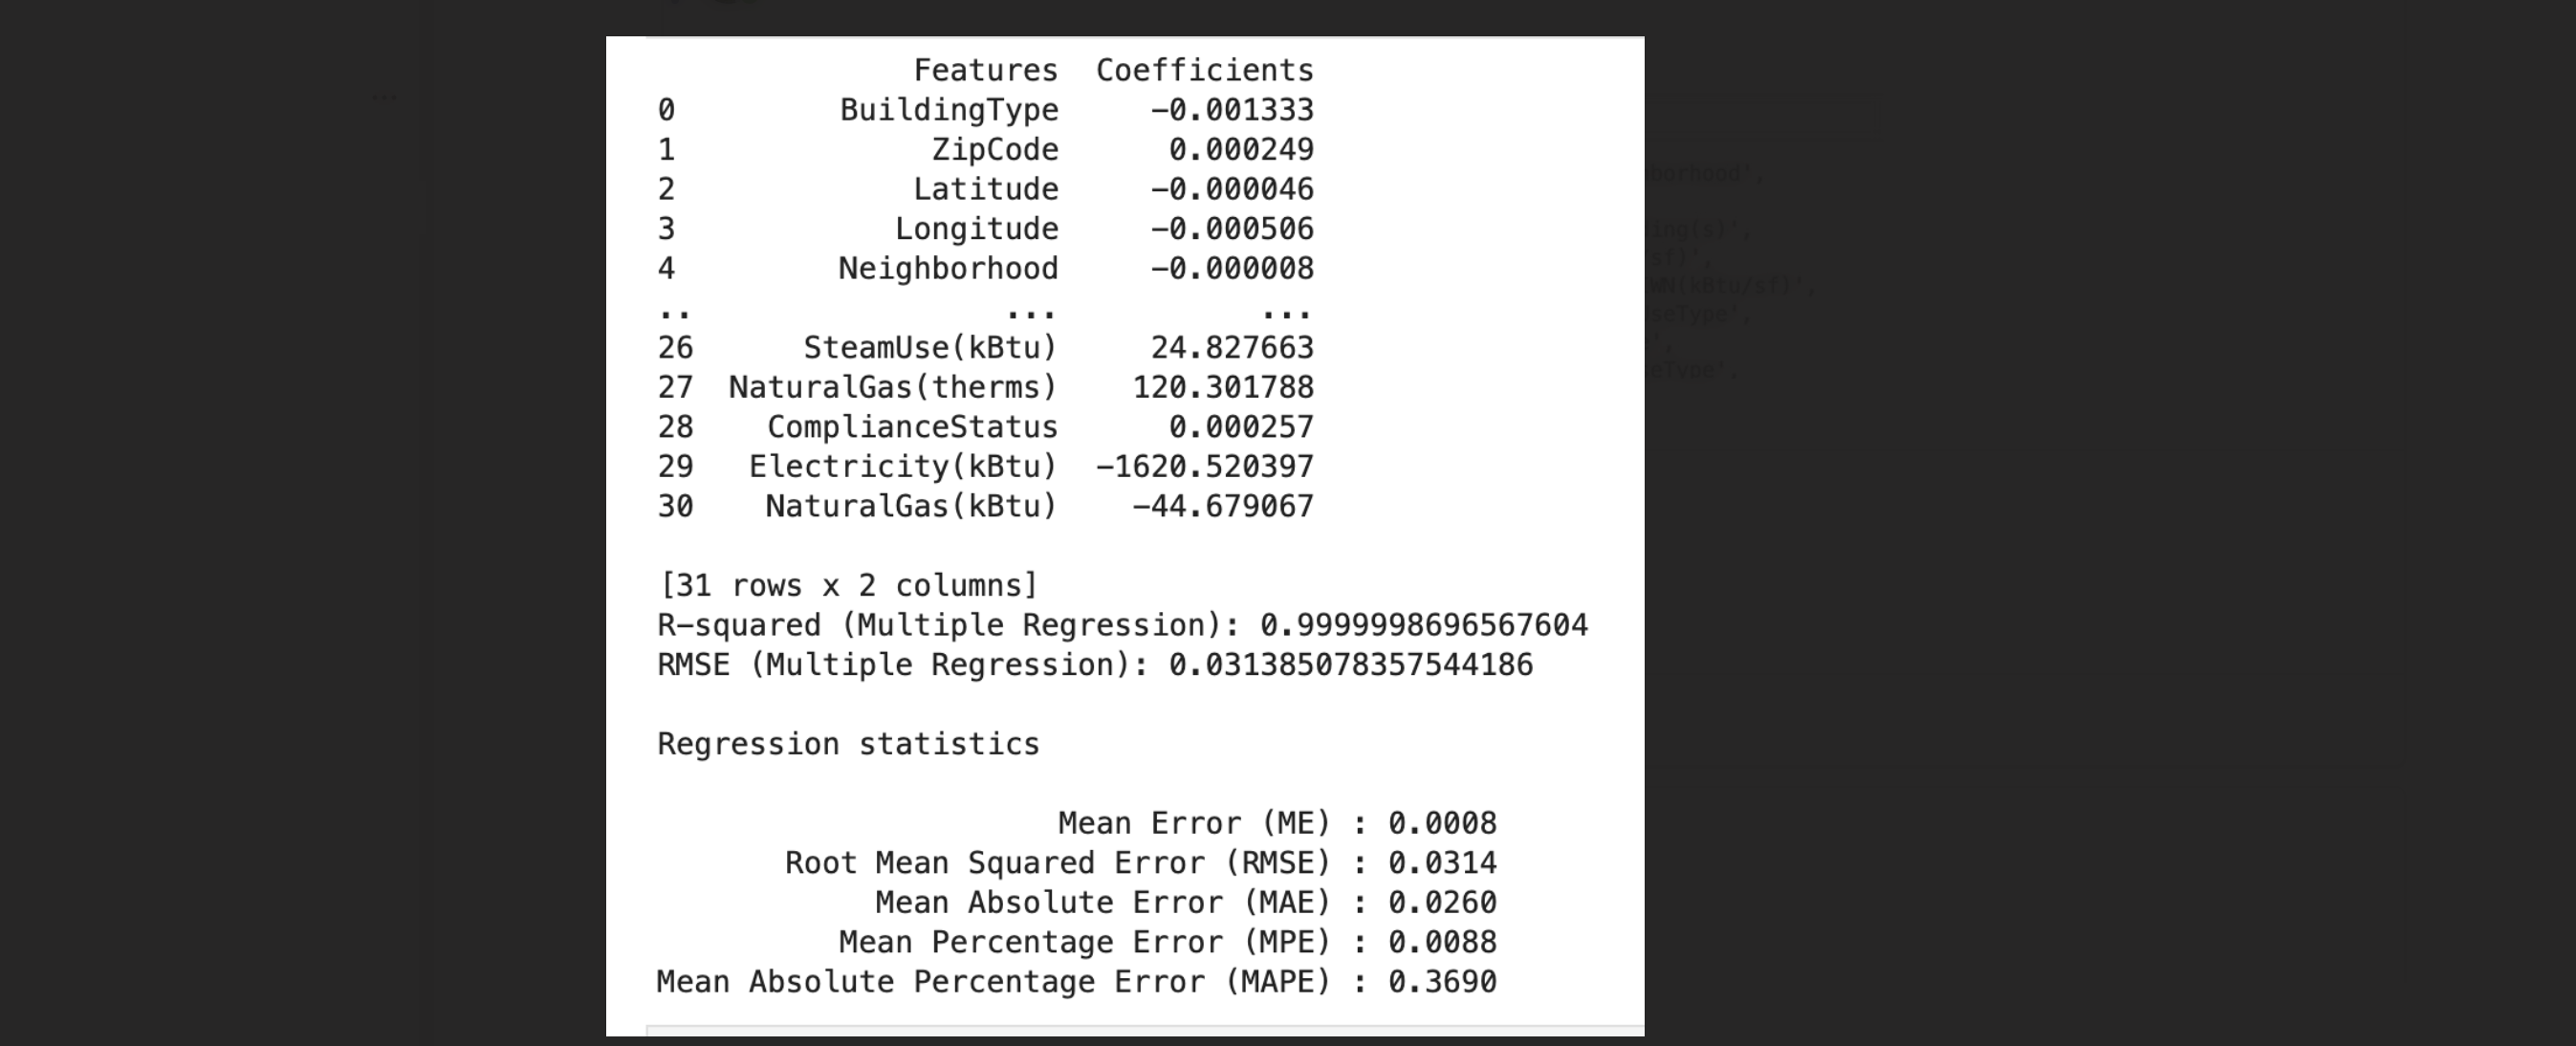